<a href="https://colab.research.google.com/github/flaxoDS/CompletelyNew/blob/master/FashionMNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformation: Tensor + Standardisierung
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Fashion-MNIST laden
train_data = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 301kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.56MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.55MB/s]


In [3]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)     # → (8, 26, 26)
        self.pool = nn.MaxPool2d(2, 2)                  # → (8, 13, 13)
        self.fc1 = nn.Linear(8 * 13 * 13, 10)           # → 10 Klassen

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 8 * 13 * 13)
        x = self.fc1(x)
        return x


In [4]:
model = FashionCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training
for epoch in range(3):
    model.train()
    total_loss = 0
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.2f}")


Epoch 1, Loss: 473.76
Epoch 2, Loss: 336.41
Epoch 3, Loss: 304.82


In [5]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 87.71%


Epoch 1, Loss: 0.3049
Epoch 2, Loss: 0.2892
Epoch 3, Loss: 0.2781
Epoch 4, Loss: 0.2684
Epoch 5, Loss: 0.2601


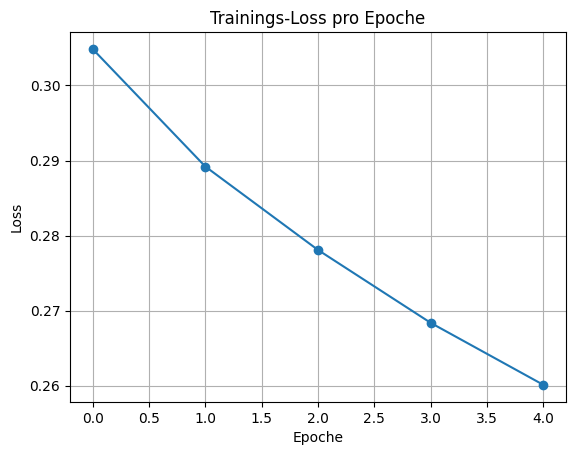

In [7]:
import matplotlib.pyplot as plt

loss_values = []

for epoch in range(5):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

# Plot Loss-Kurve
plt.plot(loss_values, marker='o')
plt.title("Trainings-Loss pro Epoche")
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


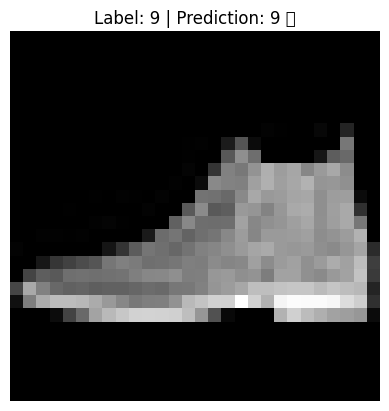

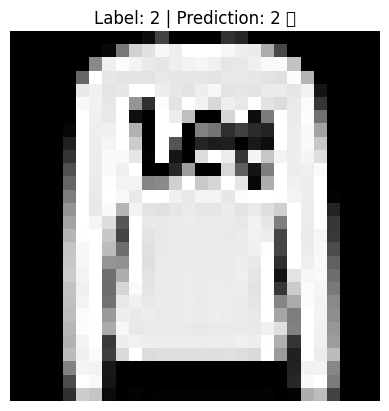

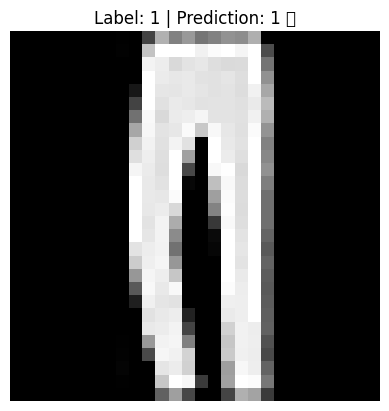

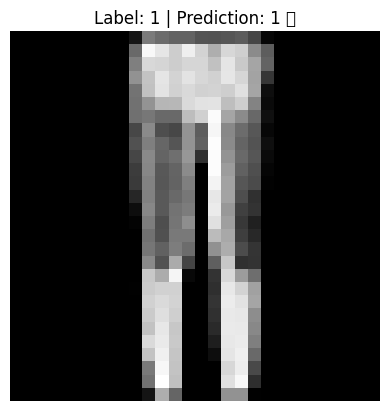

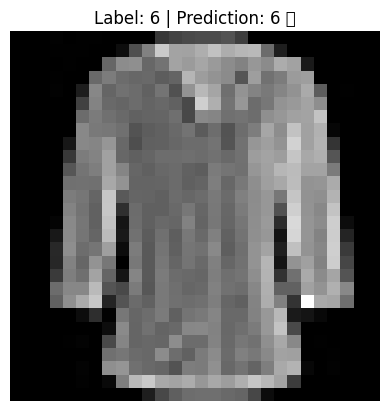

In [8]:
import matplotlib.pyplot as plt

# Hilfsfunktion zur Anzeige
def show_image(img, label, prediction=None):
    img = img.squeeze()  # Form (1, 28, 28) → (28, 28)
    plt.imshow(img, cmap="gray")
    title = f"Label: {label}"
    if prediction is not None:
        title += f" | Prediction: {prediction}"
        if prediction == label:
            title += " ✅"
        else:
            title += " ❌"
    plt.title(title)
    plt.axis("off")
    plt.show()

# Beispiel: 5 zufällige Bilder aus Testset anzeigen
model.eval()
with torch.no_grad():
    images, labels = next(iter(test_loader))
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    for i in range(5):
        show_image(images[i], label=labels[i].item(), prediction=preds[i].item())
